<h1>Import libraries<h1>

In [1]:
from Clustering_methods.Agglomerative_Clustering import *
from Clustering_methods.KMeans import *
from Clustering_methods.DBSCAN import *
from Plots.Preprocessing_plots import Preprocessing_plots
Plots_preprocessing = Preprocessing_plots()
from Plots.Other_plots import Other_Plots
Other_plots = Other_Plots()

<h1>Explenation of Clustering<h1>

$\text{Clustering is a method of dividing data into clusters that are similar among themselves and are not similar to the data in the other clusters.}$<p>
$\text{With clustering, we can significantly reduce the size of the data, or more precisely, the scope of the data.}$<p>
$\text{It is a kind of clustering that involves assigning an "identifier" to each cluster.}$<p>
$\text{We can compare it to bins in Histogram Gradient Boosting, while clustering is a process that takes into account multiple variables (multivariate).}$<p>
$\text{Examples of clustering applications:}$<p>
$\text{- Market segmentation,}$<p>
$\text{- Social network analysis,}$<p>
$\text{- Clustering of search results.}$<p>
$\text{We divide clusterization into two types: hierarchical and non-hierarchical.}$

<h1>Hierarchical Clustering<h1>

$\text{Hierarchical clustering involves separating data into different groups from a hierarchy of clusters based on some measure of similarity.}$<p>
$\text{The most popular hierarchical algorithm is agglomerative clustering. The scheme of this approach is as follows:}$<p>
$\text{1. Let each data point represent a separate cluster.}$<p>
$\text{2. We determine the distance/similarity between clusters using one of the selected metrics (described below).}$<p>
$\text{3. We select the most similar clusters based on the selected merging method (described below).}$<p>
$\text{4. We repeat steps 2 and 3 until we are left with one cluster (representing all the data).}$<p>
$\text{5. We create a dendrogram to visualize the clustering.}$<p>
$\text{6. We determine the optimal number of clusters based on the dendrogram.}$<p>

<h2>Advantages and Disadvantages of Hierarchical Clustering<h2>

$\text{Advantages of Hierarchical Clustering:}$<p>
$\text{- There is no need to define the number of clusters top-down, you can choose the optimal level based on various statistics or visualizations,}$<p>
$\text{- It is probably the easiest to interpret among all clustering algorithms.}$<p>
$\text{Disadvantages of Hierarchical Clustering:}$<p>
$\text{- Highly time-consuming process due to going through each observation for each successive clustering,}$<p>
$\text{- Depending on the choice of metric and clustering method, we may get different results.}$<p>

<h2>Metrics<h2>

$\text{The following metrics are used to determine distances/similarities between clusters:}$<p>
$\text{- Euclidean distance:}$
$$d_e\left(i,j\right)=\sqrt{\sum_{m=1}^{M}\left(x_{m,i}-x_{m,j}\right)^2}$$
$\text{- Manhattan distance:}$
$$d_e\left(i,j\right)=\sum_{m=1}^{M}\left|x_{m,i}-x_{m,j}\right|$$
$\text{- Cosine similarity:}$
$$d_e\left(i,j\right)=\frac{\sum_{m=1}^{M}\left|x_{m,i}-x_{m,j}\right|}{\sum_{m=1}^{M}x_{m,i}\times\sum_{m=1}^{k}x_{m,j}}$$

<h2>Linkage methods<h2>

$\text{The following methods are used to determine the most similar clusters (based on calculated distances):}$<p>
$\text{- Nearest neighbor method (single).}$<p>
$\text{- Farthest neighbor method (complete).}$<p>
$\text{- Group mean method (average) - based on the arithmetic mean of the distances between all pairs of objects.}$<p>
$\text{- Ward's method - based on the difference of: the sum of squares of the deviations of all observations from the centroid}$<p>
$\text{of the (newly formed) group and the sum of squares of the deviations of the combined clusters from their centroids.}$<p>
$\text{The group with the smallest such difference is created.}$
$$\Delta\left(A,B\right)=\sum_{i\in\left(A\cup B\right)}\left|\left|x_i-c_{A\cup B}\right|\right|^2-\sum_{i\in A}\left|\left|x_i-c_A\right|\right|^2-\sum_{i\in B}\left|\left|x_i-c_B\right|\right|^2=$$
$$=\frac{N_A\times N_B}{N_A+N_B}\times\left|\left|c_A-c_B\right|\right|^2$$
$\text{Where: } A, \ B \text{ - existing clusters that we will potentially merge,}$<p>
$c_{A\cup B} \text{ - the cluster centroid of the merged clusters A and B (a point with coordinates equal to the arithmetic mean of each variable),}$<p>
$c_A,c_B \text{ - currently existing centroids of clusters A and B,}$<p>
$N_A,\ N_B \text{ - number of coordinates in klaster A and B.}$

<h2>Download data<h2>

In [2]:
data = pd.read_csv("Data/WHR.csv", index_col=0)
data

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031


$\text{For further analysis we will only use countries from western europe.}$

In [3]:
data = data.loc[data['Regional indicator'] == 'Western Europe']

$\text{We wiill also use only Ladder Score to determine clusters.}$<p>
$\text{Ladder Score is a average happiness score in each country.}$

In [4]:
X = data[["Ladder score"]]

In [5]:
my_model = Agglomerative_Clustering(metric='euclidean', linkage='complete', random_state=17)
my_model.fit(X=X)

$\text{In the following analysis, we will use the algorithm from the sklearn library, due to the larger number of methods it contains.}$<p>
$\text{Nevertheless, at the beginning it would be useful to verify in some way whether the algorithm I have built works.}$

In [6]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(metric="euclidean", linkage="complete", n_clusters=None, distance_threshold=True)
model = model.fit(X)
print("Models have same children_ attribute: {}".format(np.all(my_model.children_ == model.children_)))
print("Average distance for my model: {}; Average distance for sklearn model: {}".format(np.mean(my_model.distances_), np.mean(model.distances_)))

Models have same children_ attribute: True
Average distance for my model: 0.36238501069999995; Average distance for sklearn model: 0.36238501069999995


$\text{It appears that both the connectivity and overall distance between the selected clusters are identical.}$

<h1>Finding optimal number of clusters<h1>

<h2>Dendrogram<h2>

$\text{A dendrogram is a diagram showing the result of hierarchical clustering of observations.}$<p>
$\text{It allows us to know exactly which observations/categories went into the selected clusters.}$

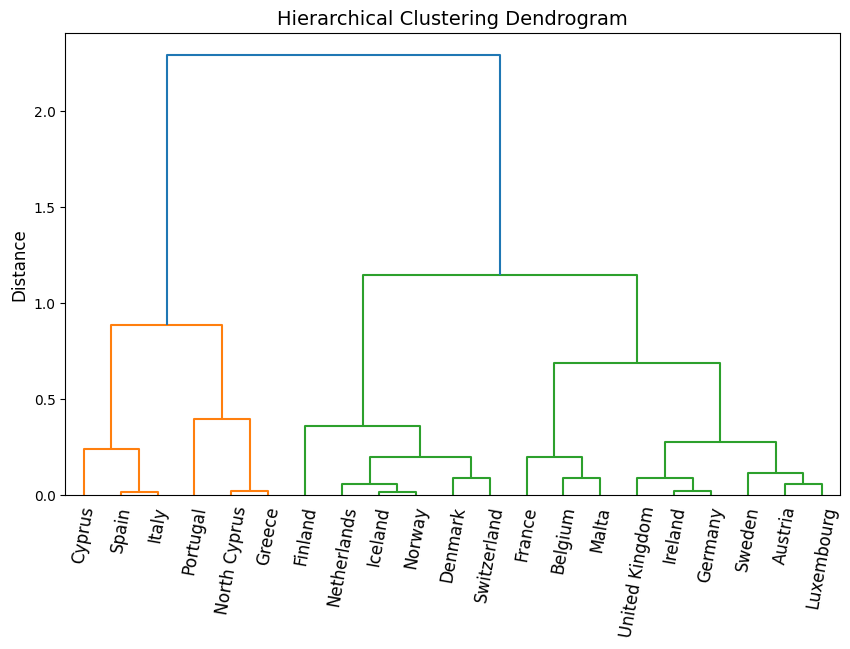

In [7]:
Other_plots.dendrogram_plot(children=model.children_, distances=model.distances_, labels=X.index, p=5)

$\text{There is no single official method for selecting the optimal number of clusters based on the dendrogram.}$<p>
$\text{One option might be to determine 20\% from the total distance, and then check whether subsequent splits result in lines longer than this value.}$<p>
$\text{If yes, it means that a split should take place - the number of clusters increases.}$

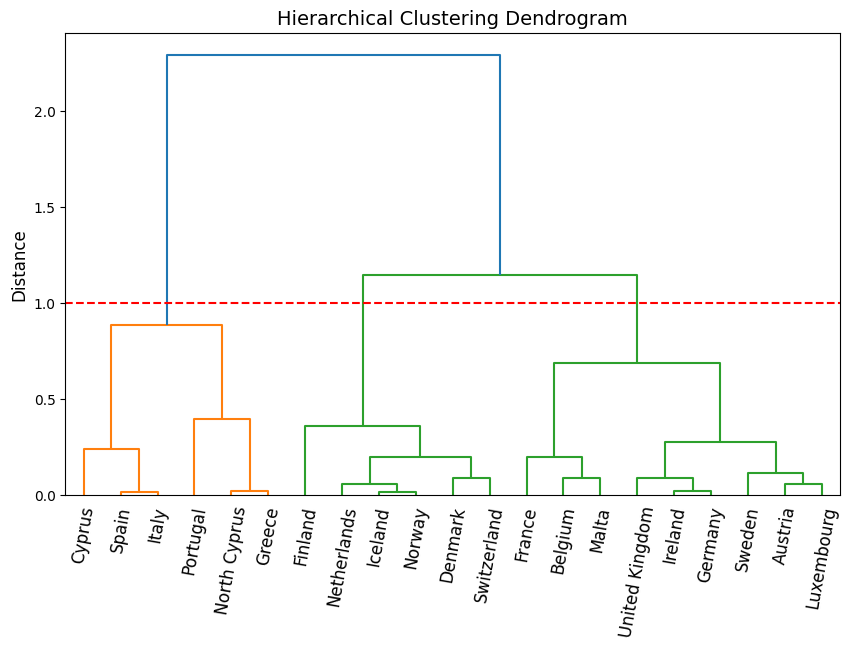

In [8]:
Other_plots.dendrogram_plot(children=model.children_, distances=model.distances_, labels=X.index, p=5, hline_level=1.0)

$\text{Here, the choice of } k=3 \text{ seems fairly reasonable not only because of the good separation,}$<p>
$\text{but also considering the countries that are in each cluster }$<p>
$\text{(by geography/culture, we see similarities between Italy and Spain, or Iceland and Norway).}$

$\text{It is worth noting, that the dendrogram should nevertheless be taken more as a reference when choosing the number of clusters.}$<p>
$\text{Depending on the linking methods and distance metrics used, it can generate different results.}$

$\text{For a metric to evaluate clustering to be appropriate it should take into account two concepts:}$<p>
$\text{- Cohesion: how closely are observations related within each cluster.}$<p>
$\text{- Separation: the distance between clusters.}$<p>
$\text{As we can see dendrogram does not provide ant of this information.}$<p>
$\text{We will discuss some of popular methods for evaluation below.}$

<h2>Elbow method<h2>

$\text{The optimal number of clusters is determined by the sum of squares (SSE) of the distance between the observations}$<p>
$\text{and the centroid of the cluster to which they belong.}$<p>
$\text{The intra-cluster SSE (also called distortion) can be written as:}$
$$SSE=\sum_{k=1}^{K}\sum_{i\in k}\left|\left|x_{k,i}-c_k\right|\right|^2$$
$\text{Where: } K \text{ - number of clusters,}$<p>
$x_{k,i} \text{ - observation } i \text{ belonging to cluster } k,$<p>
$c_k \text{ - centroid of cluster } k.$

$\text{The optimal number of clusters is the one for which "elbow bending" occurs, that is, the line flattens out.}$<p>
$\text{Of course, the answer will not always be clear.}$<p>
$\text{Determining the maximum curvature can help us. The scheme of operations is as follows:}$

$\text{1. We create a graph containing our curve and a straight line passing through its extremities.}$

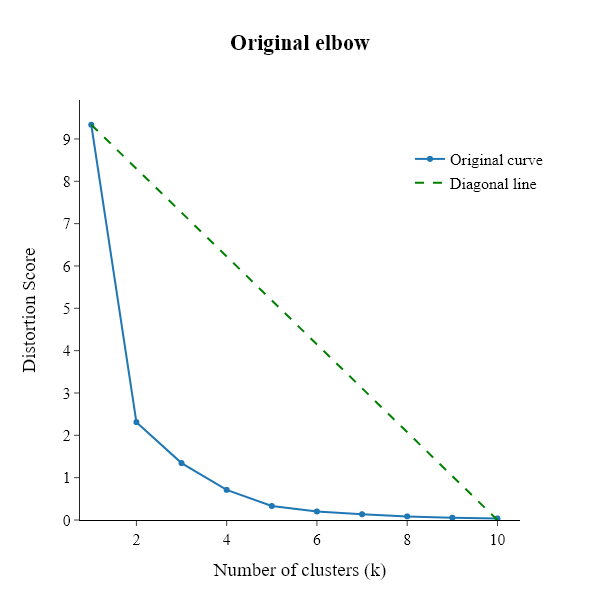

In [9]:
Other_plots.elbow_original_plot(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=10)

$\text{2. We normalize the values to the interval [0,1].}$

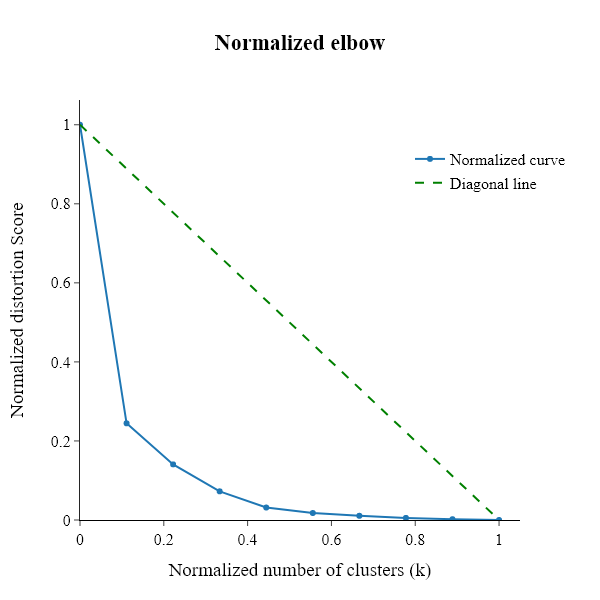

In [10]:
Other_plots.elbow_normalized_plot(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=10)

$\text{3. We determine the perpendiculars from our points to the diagonal line.}$

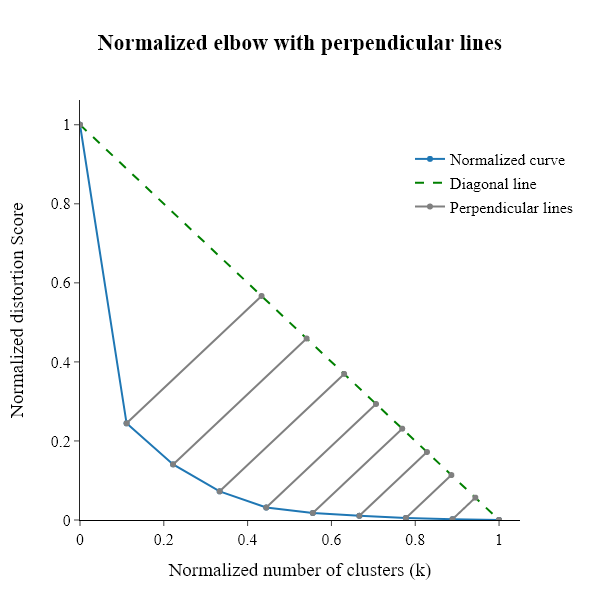

In [11]:
Other_plots.elbow_normalized_plot_with_perpendicular(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=10)

$\text{4. We rotate them by 45 degrees, the size of these rotated lines indicates the difference between our curve and the diagonal line.}$

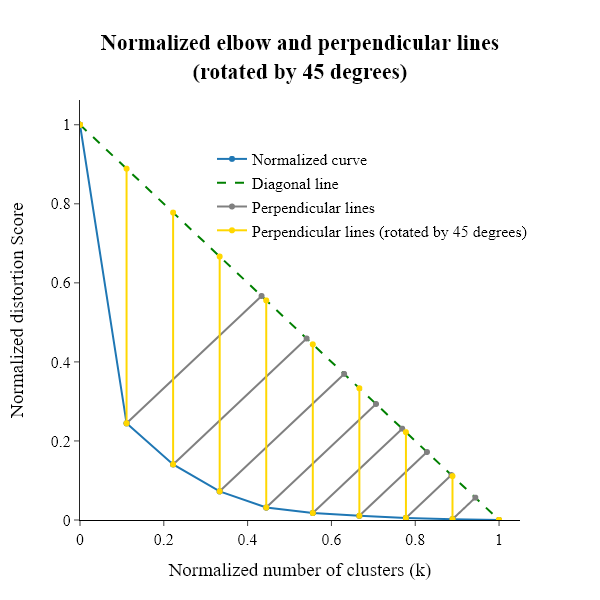

In [12]:
Other_plots.elbow_normalized_plot_with_perpendicular_rotated(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=10)

$\text{5.Create a difference chart.}$

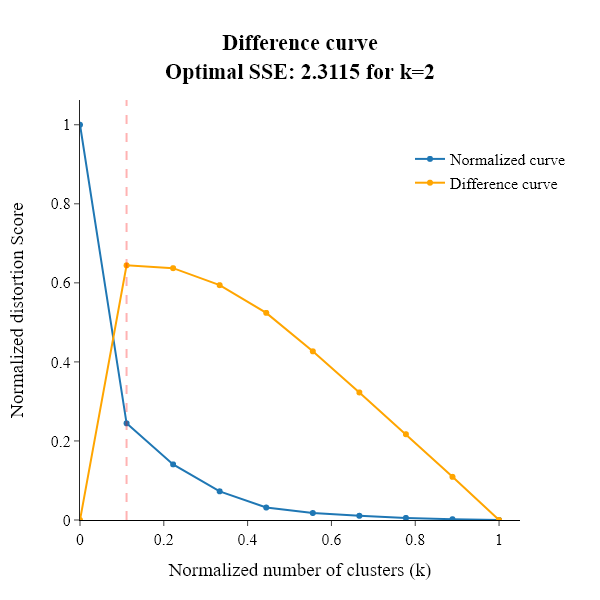

In [13]:
Other_plots.difference_curve(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=10)

$\text{For the point at which the maximum value of differences is reached, the maximum curvature of the analyzed curve is obtained.}$<p>
$\text{To verify for which value it was adopted we can "inverse normalize" our curve.}$<p>
$\text{In this case, the optimal number of clusters is: } k=2.$<p>
$\text{Note that we can use this process for the roc curve, or when determining the } \varepsilon \text{ for the DBSCAN algorithm.}$<p>
$\text{The disadvantage of the elbow method is that it takes into account only the cohesion within a cluster, ignoring the separation between clusters.}$

<h2>Silhouette Coefficient<h2>

$\text{Silhouette Coefficient is a measure of the similarity of an object within a cluster (cohesion) compared to other clusters (separation).}$<p>
$\text{For a single observation } i, \text{ the average distance between that observation and the other points in the cluster to which it belongs can be written as:}$
$$a_i=\frac{1}{N_k-1}\times\sum_{j\in k\land i\neq j}\left|\left|x_i-x_j\right|\right|^2$$
$\text{Where: } N_k \text{ - the number of observations in cluster } k$<p>
$\text{The above value can be interpreted as a measure of how well an observation is assigned to its cluster }$<p>
$\text{(the smaller the value, the better the assignment, the greater the consistency within the cluster).}$<p><br>
$\text{The average distance between observation } i, \text{ and the observations from the closest cluster can be written as:}$
$$b_i=\min{\left(\frac{1}{N_J}\times\sum_{j\in J}\left|\left|x_i-x_j\right|\right|^2\right)}$$
$\text{Where: } N_J \text{ - the number of observations in the } J \text{ cluster } (J \neq k).$<p>
$\text{The } b_i \text{ can be interpreted as a measure of the "dissimilarity" of the observation } i \text{ relative to the nearest cluster}$<p>
$\text{(the larger the value, the better the separation between clusters).}$<p><br>
$\text{The value of the Silhouette metric for observation } i \text{ will then be:}$
$$S_i=\frac{b_i-a_i}{\max{\left(a_i,b_i\right)}}$$
$\text{If there is only one observation in the cluster, then the value of } S_i \text{ is 0.}$<p>
$\text{Finally, having } S_i \text{ values for each observation, we can calculate the Silhouette coefficient:}$
$$SC=\frac{1}{N}\times\sum_{i=1}^{N}S_i$$
$\text{The range of the coefficient is: } \left[-1,1\right]$<p>
$\text{Higher values mean that the points have been placed in the right clusters, and there is a clear division between the groups.}$<p>
$\text{If SC has lower values, there is a high probability that we have created too many (little separation between groups) or too few (large distances within groups) clusters.}$<p><br>
$\text{In the case of the Silhouette method, the choice of the optimal number of clusters is simple - the best } k \text{ is the one for which SC takes its maximum.}$<p>
$\text{Thus, let's note that Silhouette satisfies both the condition for consistency and separation between clusters.}$

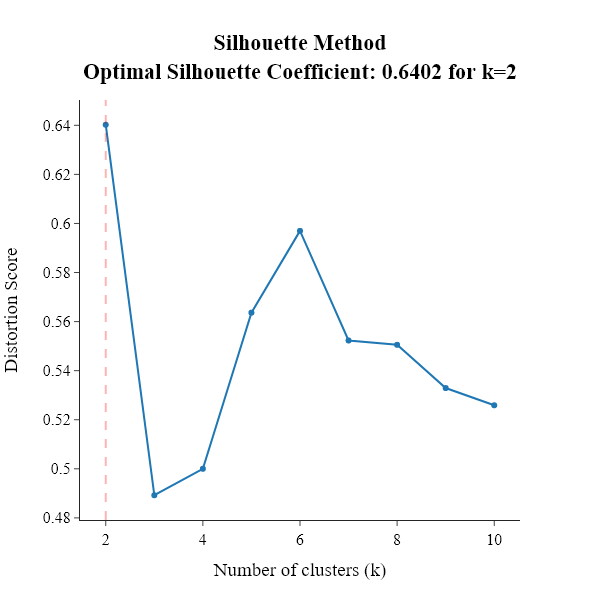

In [14]:
Other_plots.silhouette_plot(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=10)

$\text{Based on above graph optimal number of clusters is 2.}$

$\text{We can also visualize silhouette score for each point in the particular cluster.}$<p>
$\text{It would be perfect if:}$<p>
$\text{- each cluster exceeded the average silhouette score for the entire collection,}$<p>
$\text{- the distribution of the silhouette score was similar for each cluster.}$

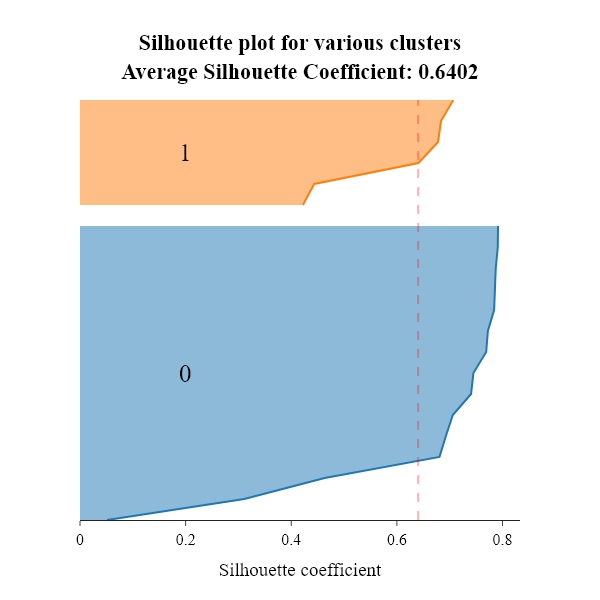

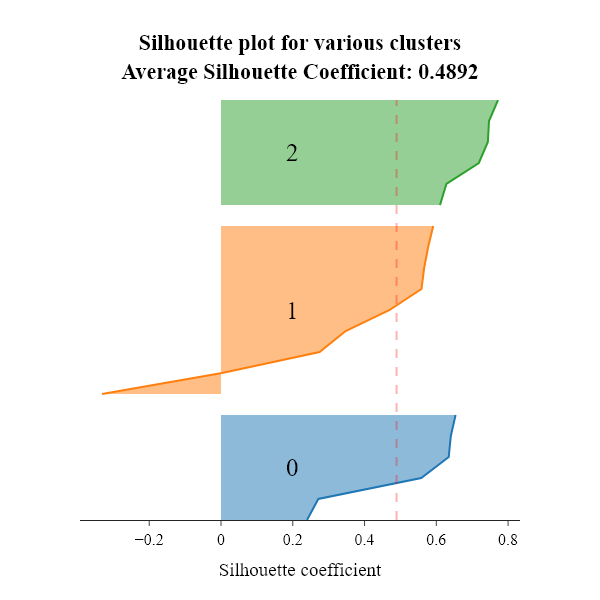

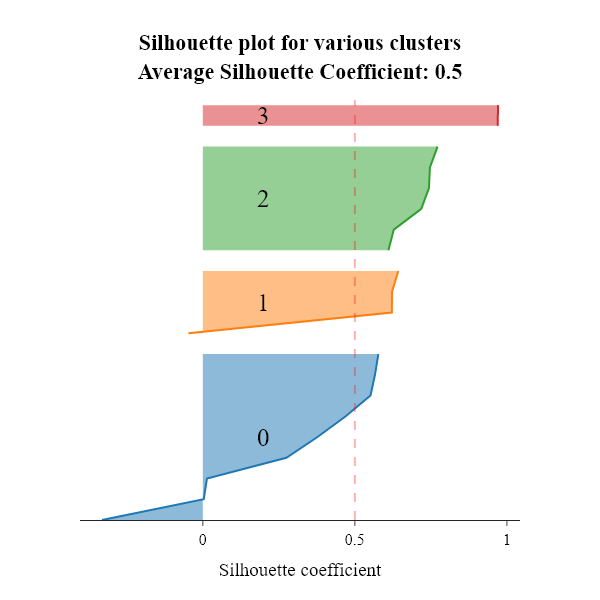

In [15]:
Other_plots.silhouette_plot_for_various_clusters(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), max_clusters=4)

$\text{Well it looks like for our small dataset the best option is to choose 2 clusters.}$<p>
$\text{Note that for some observations silhouette score is less than 0}$<p>
$\text{It probably means that these observations are at the edges of clusters or are outliers.}$

<h2>Gap statistic<h2>

$\text{The gap statistic compares the total intra-cluster variability for a different number of clusters with their expected values under a zero uniform distribution.}$<p>
$\text{Based on the above methods, we know how to determine the SSE, but the problem is to find out what a "small" value of this metric really means}$<p>
$\text{For this purpose, an artificial random set is generated, which should not have top-down defined groups (clusters).}$<p>
$\text{Since a single dataset can lead to erroneous inference (for example, such random values are drawn that actually contain clusters),}$<p>
$\text{a dozen such reference sets are created and the results are averaged.}$<p><br>
$\text{The reference data is identical in size to our dataset: } [n\_samples,n\_features],$<p>
$\text{while for each variable they are generated for a uniform distribution with the interval } [min_m,{max}_m].$<p>
$\text{The gap statistic for } k \text{ number of clusters is:}$
$$Gap\left(k\right)=E\left(\log{\left({SSE}_{references,k}\right)}\right)-\log{\left(SSE_k\right)}$$
$\text{Where: } E\left(\log{\left({SSE}_{references,k}\right)}\right) \text{ -the average of the logarithm of the sum of squares of the distances of observations from centroids for reference sets with } k \text{ number of clusters,}$<p>
$\log{\left(SSE_k\right)} \text{ - the logarithm of the sima of the squares of the distances of observations from centroids for the original set.}$<p>
$\text{We will want to choose the value of } k \text{ for which the gap statistic reaches the largest value.}$<p>
$\text{We want the SSE for the real data to be as small as possible relative to the SSE for the random dataset.}$<p>
$\text{Since, in many cases, datasets are very difficult to partition into clusters and it may be that the gap statistic will increase as the number of clusters increases,}$<p>
$\text{the standard deviation of the SSE from the reference datasets should also be included in the equation.}$<p>
$\text{We should choose the largest such } k \text{ for which:}$
$$Gap\left(k\right)\geq Gap\left(k+1\right)-std_{k+1}$$
$$std_k=\sqrt{\frac{\sum_{b=1}^{B}{\log{\left({SSE}_{b,k}\right)}-\bar{\log{\left({SSE}_{references,k}\right)}}}}{B}}$$
$\text{Where: } B \text{ - number of reference sets.}$<p><br>
$\text{The disadvantage of the gap statistic, as with the elbow method, is that only the distance inside the cluster is considered.}$

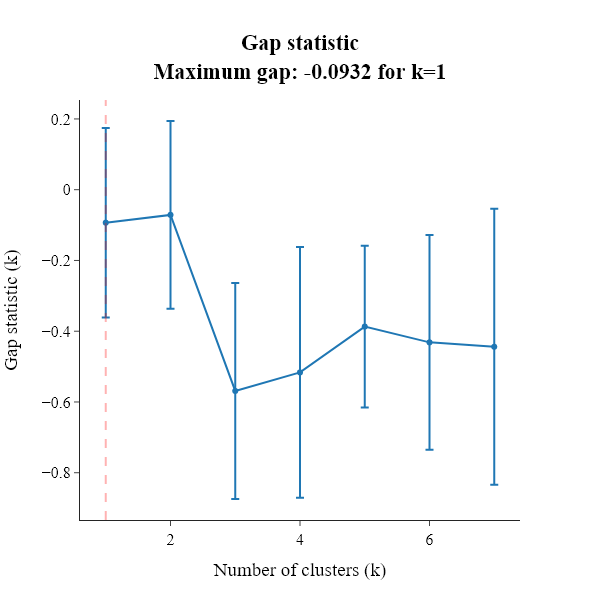

In [16]:
Other_plots.gap_plot(data=X, algorithm_instance=AgglomerativeClustering(metric="euclidean", linkage="ward"), number_of_reference_datasets=30, max_clusters=7)

$\text{The optimal number of clusters based on the above graph is 1. Since this is the smallest } \text{ k for which the condition is satisfied: }$
$$Gap\left(k\right)\geq Gap\left(k+1\right)-std_{k+1}$$

<h1>KMeans<h1>

$\text{1. Random initialization of } K \text{ number of centroids.}$<p>
$\text{2. Determination of the Euclidean distance between each observation and the centroids.}$<p>
$\text{3. Assigning each observation to the nearest centroid.}$<p>
$\text{4. Updating the centroid values as the arithmetic mean of the points belonging to a given cluster.}$<p>
$\text{5. Repeating steps 2 through 4 until a fixed number of iterations is reached or the centroids stop changing.}$<p>

<h2>Advantages and Disadvantages of KMeans<h2>

$\text{Advantages of KMeans:}$<p>
$\text{- Implementation and interpretation is quite simple,}$<p>
$\text{- For large datasets, fastest compilation time among all clustering algorithms.}$<p>
$\text{Disadvantages of KMeans:}$<p>
$\text{- Because the distances are simple and absolute measures, outliers, or variables with larger nominal values than the others (which, if not significant, can significantly degrade the results),}$<p>
$\text{can have a very large impact on the results. For this reason, it is a very important step to use selection and standardization of variables.}$

$\text{We will use special dataset with cryptocurrencies.}$

In [17]:
data = pd.read_csv("Data/crypto.csv", index_col=0)
data

,returns,variance_of_returns
BTC-USD,0.547448,13.850416
ETH-USD,1.216571,18.438754
USDT-USD,0.001901,1.196287
BNB-USD,1.541341,20.809213
XRP-USD,0.904552,23.159546
USDC-USD,0.000620,1.200959
DOGE-USD,2.948174,49.355333
ADA-USD,1.294777,21.482204
TRX-USD,0.983574,19.228890
DAI-USD,0.009600,2.665712


$\text{The data (especially for the variance\_of\_returns column) is from a fairly wide range.}$<p>
$\text{To prevent bias clustering of the data, the first step will be to scale it.}$

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

$\text{At this stage, it would also be useful to use PCA to reduce dimensionality.}$<p>
$\text{However, due to the fact that our data contains only two dimensions we will not do this.}$<p><br>
$\text{Use same metrics as before to find out what is optimal number of clusters.}$

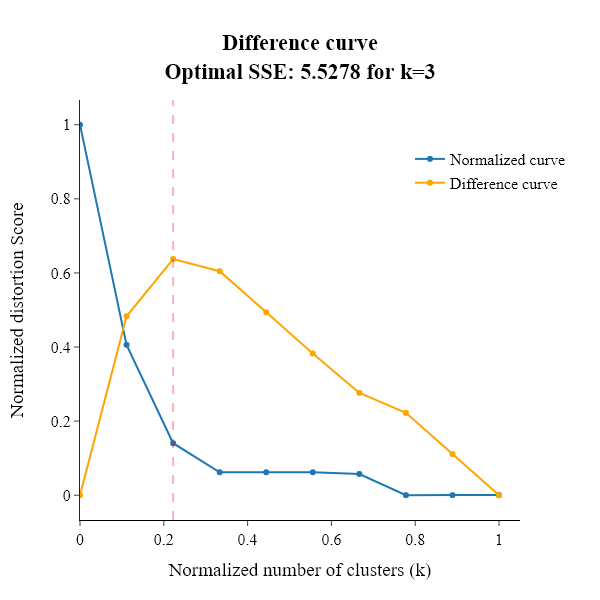

In [19]:
Other_plots.difference_curve(data=data_scaled, algorithm_instance=KMeans(n_init=100, max_iter=100, tol=1e-4, random_state=17), max_clusters=10)

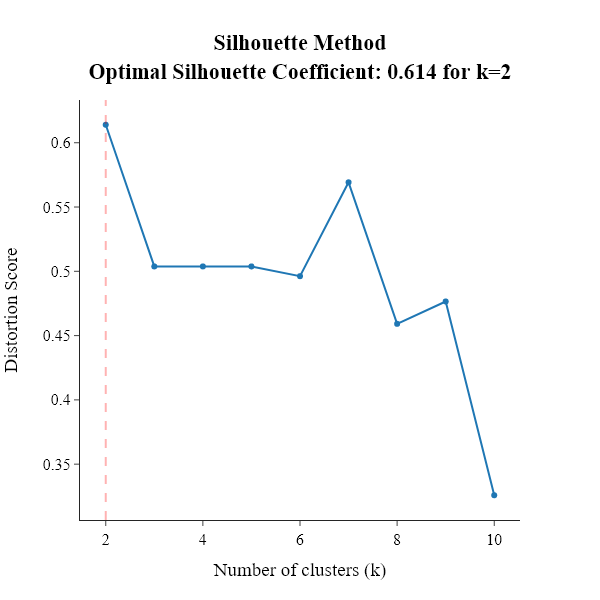

In [20]:
Other_plots.silhouette_plot(data=data_scaled, algorithm_instance=KMeans(n_init=100, max_iter=100, tol=1e-4, random_state=17), max_clusters=10)

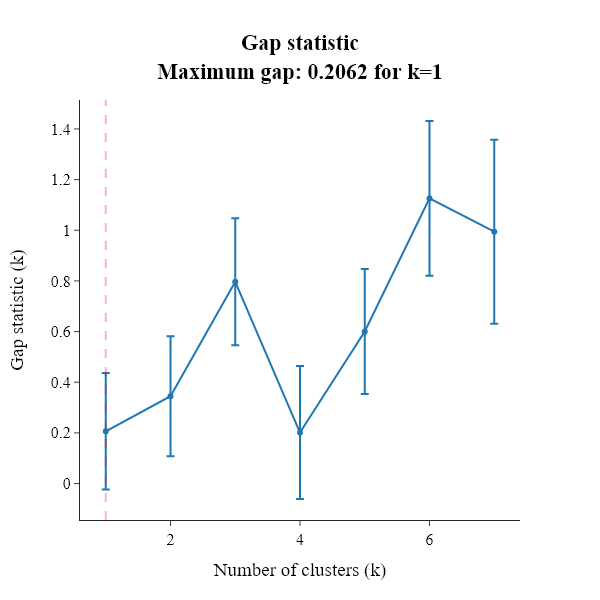

In [21]:
Other_plots.gap_plot(data=data_scaled, algorithm_instance=KMeans(n_init=100, max_iter=100, tol=1e-4, random_state=17), number_of_reference_datasets=30, max_clusters=7)

$\text{It seems that each method shows different optimal values.}$<p>
$\text{For small data sets, unfortunately, it is difficult to clearly indicate which one should be correct.}$<p>
$\text{The Silhouette statistic indicates that a value of } k=2 \text{ would be appropriate.}$<p>
$\text{However, for gap statistic and elbow, a reasonable choice is a value of } k=3.$<p>
$\text{For this purpose, let's verify which cryptocurrencies go into the clusters in both cases.}$<p>
$\text{In addition, we will visualize the results with a scatter plot.}$

$k=2$

In [22]:
model = KMeans(n_clusters=2, n_init=100, max_iter=100, tol=1e-4, random_state=17)
model.fit(X=data_scaled)
data_k_2 = data.copy()
data_k_2['cluster'] = model.labels_
data_k_2.sort_values(by='cluster', inplace=True)
data_k_2

,returns,variance_of_returns,cluster
DOGE-USD,2.948174,49.355333,0
MATIC-USD,2.439541,29.398899,0
BTC-USD,0.547448,13.850416,1
ETH-USD,1.216571,18.438754,1
USDT-USD,0.001901,1.196287,1
BNB-USD,1.541341,20.809213,1
XRP-USD,0.904552,23.159546,1
USDC-USD,0.000620,1.200959,1
ADA-USD,1.294777,21.482204,1
TRX-USD,0.983574,19.228890,1


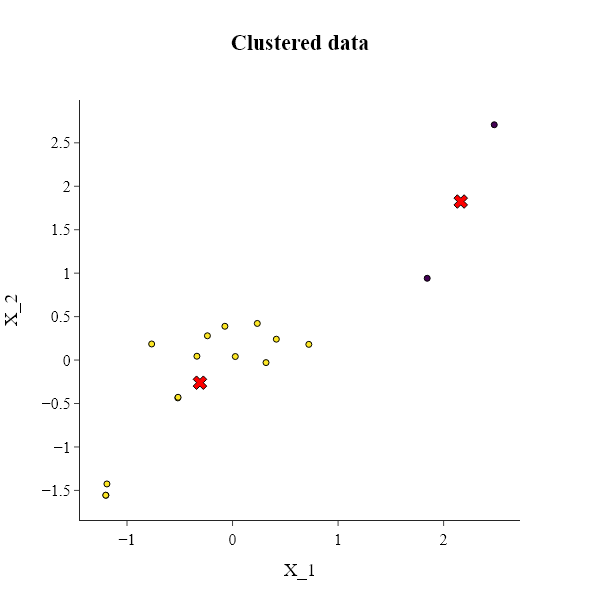

In [23]:
Other_plots.plot_cluster_2d_data(data=data_scaled, model=model)

$\text{For } k=2, \text{ the cryptocurrencies that had the highest returns and variance\_of\_returns went into one of the clusters.}$

$k=3$

In [24]:
model = KMeans(n_clusters=3, n_init=100, max_iter=100, tol=1e-4, random_state=5)
model.fit(X=data_scaled)
data_k_3 = data.copy()
data_k_3['cluster'] = model.labels_
data_k_3.sort_values(by='cluster', inplace=True)
data_k_3

,returns,variance_of_returns,cluster
BTC-USD,0.547448,13.850416,0
ETH-USD,1.216571,18.438754,0
BNB-USD,1.541341,20.809213,0
XRP-USD,0.904552,23.159546,0
ADA-USD,1.294777,21.482204,0
TRX-USD,0.983574,19.228890,0
LTC-USD,0.692252,19.268125,0
WBTC-USD,0.549170,13.928888,0
BCH-USD,0.349008,20.859353,0
XLM-USD,0.771907,21.926119,0


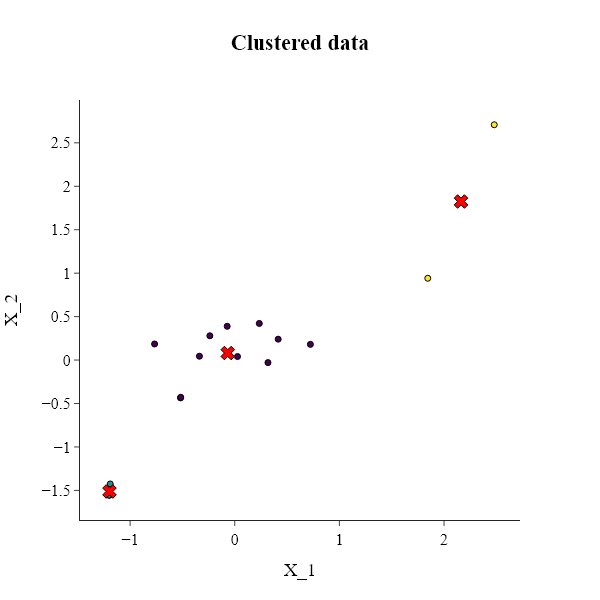

In [25]:
Other_plots.plot_cluster_2d_data(data=data_scaled, model=model)

$\text{For } k=3 \text{ there are stable coins in one of the clusters (1).}$<p>
$\text{In the next one (2) are Dogecoin and Matic characterized by higher returns and variance\_of\_returns than the other cryptocurrencies.}$<p>
$\text{In the last one there are remaining cryptocurrencies.}$<p><br>
$\text{Thus, the division into three clusters looks more reasonable from an "expert" point of view.}$

<h1>DBSCAN<h1>

$\text{DBSCAN identifies clusters based on the local density of data points.}$<p>
$\text{The algorithm requires only two parameters:}$<p>
$- \ \varepsilon \text{ - the radius of the hyperplane around the observation,}$<p>
$- \ min\_points \text{ - the minimum number of points required inside the circle (including the analyzed point) for a data point to be classified as Core.}$<p>
$\text{If the number of observations inside the hyperplane defined by } \varepsilon \text{ contains at least min\_points } \rightarrow \text{ point is called Core Point.}$<p>
$\text{If the number of observations inside the hyperplane defined by } \varepsilon \text{ is within the range of } \left(1,\ min\_points\right)\rightarrow \text{ the point is called Border Point.}$<p>
$\text{If the number of observations inside the hyperplane defined by } \varepsilon \text{ contains only this one observation } \rightarrow \text{ point is called Noise Point.}$

$\text{Another important element of DBSCAN is the clustering of observations.}$<p>
$\text{For this we will need three concepts:}$<p>
$\text{- Directly density-reachable: if observation } X \text{ belongs to a neighborhood of observations } Y \text{ (i.e., } d\left(X,Y\right)\le\varepsilon) \text{ and observation } Y \text{ is a Core Point,}$<p>
$\text{then } X \text{ is directly density-reachable from } Y \text{ (doesn't necessarily work the other way around, because X doesn't have to be a Core Point).}$<p><br>
$\text{- Density-reachable: if there is a chain of points } p_1, \ p_2,\ \ldots, \ p_n \text{ such that } p_i \text{ is directly density-reachable from } p_{i+1} \text{ and } p_1=X,\ p_n=Y, \text{ then } X \text{ is density-reachable from }Y.$<p><br>
$\text{- Density-connected: if there are points } X \text{ and } Y \text{ that are reachable by density from } O \text{, then } X \text{ and } Y \text{ are density-connected.}$

<h3>Scheme of DBSCAN<h2>

$\text{1) We start by finding a random Core Point in the dataset (which does not belong to any cluster so far) and assign it and its neighbors (if they do not already have an assigned label) an unused label.}$<p><br>
$\text{(2) Among the observations of a Core Point's neighborhood (provided we were able to find one), we check for other Core Points.}$<p>
$\text{If so, for each such point we check its neighborhood and repeat step 2 over and over again.}$<p>
$\text{If there is no Core Point then we return to step 1 and try to find a new Core Point among the unlabeled data.}$<p><br>
$\text{(3) We repeat the process until we have no Core Point at point 1. then the unlabeled observations are considered Noise Point and we assign them a label: -1.}$

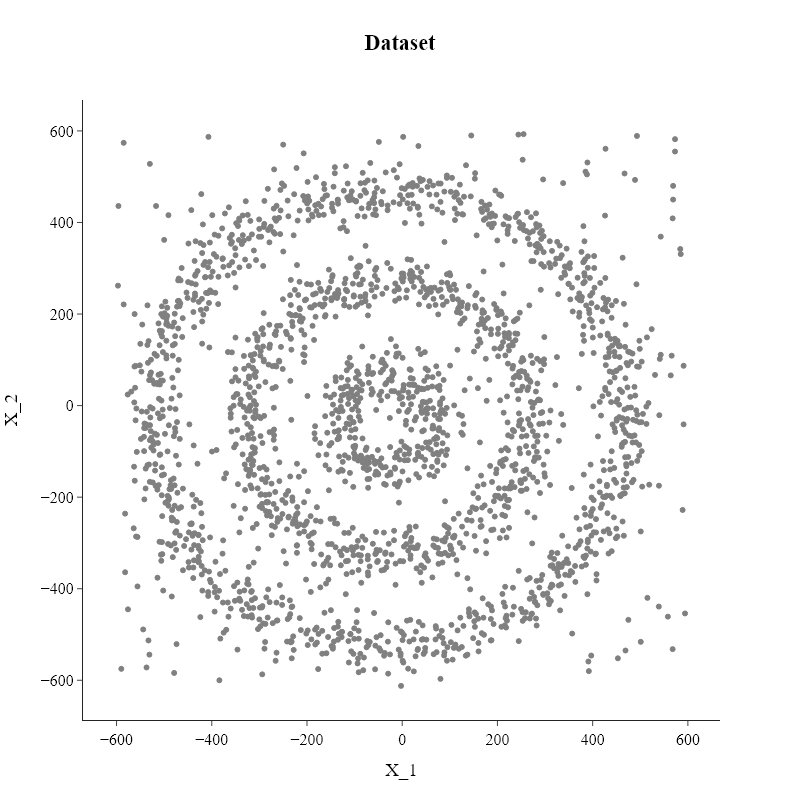

In [26]:
np.random.seed(42)
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]
df=pd.DataFrame(PointsInCircum(500,1000))
df=pd.concat([df, pd.DataFrame(PointsInCircum(300,700))])
df=pd.concat([df, pd.DataFrame(PointsInCircum(100,300))])
df=pd.concat([df, pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])])
fig = go.Figure()
fig.add_trace(go.Scatter(x=df[0], y=df[1], mode='markers', marker=dict(color='grey', size=5, line=dict(color='grey', width=1))))
fig.update_layout(template="simple_white", width=800, height=800, xaxis_title="X_1", yaxis_title="X_2", showlegend=False, title="<b>Dataset<b>", title_x=0.5, font=dict(family="Times New Roman",size=16,color="Black"))
fig.show("png")

$\text{We can see three different dense clusters in the form of concentric circles with some noise here.}$<p>
$\text{Now, let’s run Hierarchical clustering and K-Means algorithms and see how they cluster these data points.}$

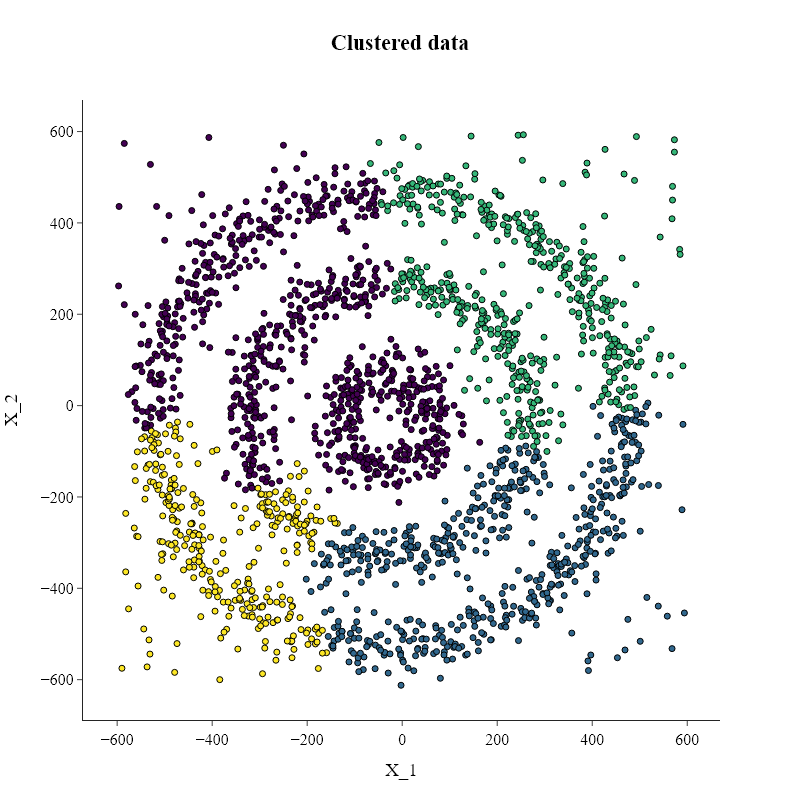

In [27]:
model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
model.fit(df)
Other_plots.plot_cluster_2d_data_without_centers(data=df, model=model)

$\text{Well it looks like hierarchical clustering failed to cluster data points properly.}$

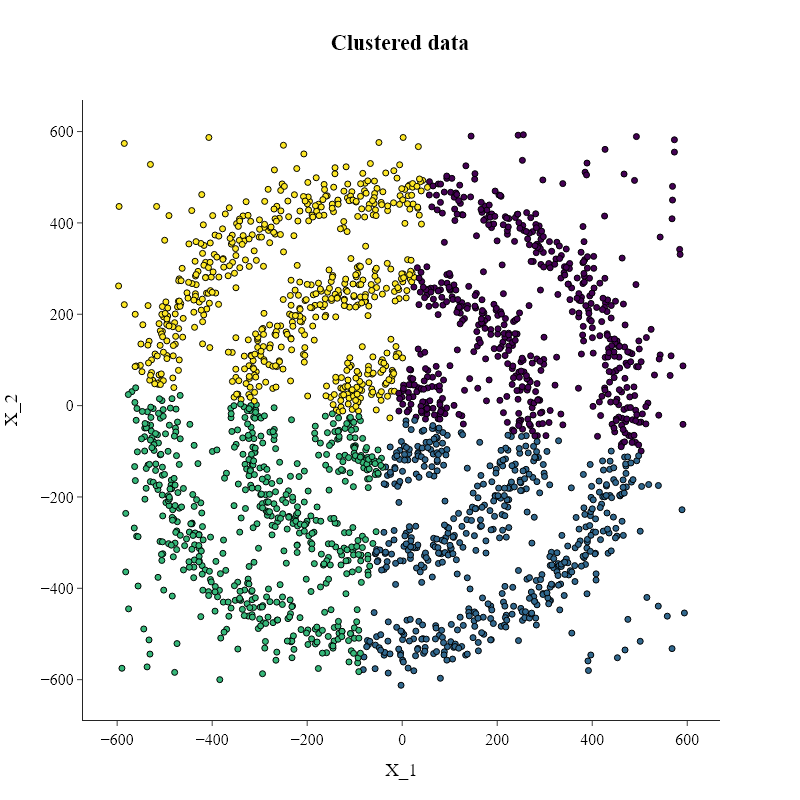

In [28]:
model = KMeans(n_clusters=4, n_init=10, max_iter=500)
model.fit(df)
Other_plots.plot_cluster_2d_data_without_centers(data=df, model=model)

$\text{K-means also failed to cluster the data points into four clusters.}$<p>
$\text{Moreover, didn’t work well with noise.}$

$\text{Let's find out how our DBSCAN algorithm will work it out.}$

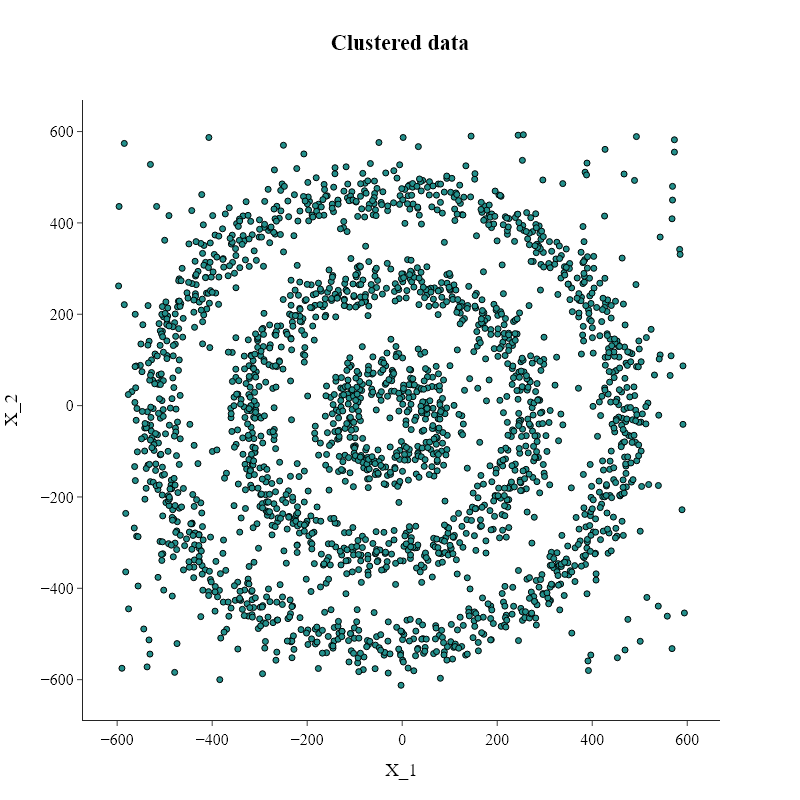

In [29]:
model = DBSCAN(epsilon=0.5, min_points=5, random_state=17)
model.fit(df)
Other_plots.plot_cluster_2d_data_without_centers(data=df, model=model)

$\text{Well it looks like all of the data points were labelled as Noise Points.}$<p>
$\text{We will try to tune } \varepsilon \text{ and min\_points to obtain better results.}$

$\text{Despite the fact that in this algorithm there is no need to choose a metric, a merging method, or even the number of clusters,}$<p>
$\text{it would be useful to find the optimal values of } \varepsilon \text{ and min\_points.}$

$\text{For min\_points, there is no single known method, mainly expert knowledge is used.}$<p>
$\text{What can be taken into account, however, is the number of } D \text{ dimensions in the dataset being analyzed.}$<p>
$\text{The general rule of thumb is that } min\_points \geq D+1.$<p>
$\text{However, for large data sets, with noise and outliers } min\_points=2\times D \text{ is suggested.}$<p>
$\text{In this case we will use } min\_points=6 \text{ because of a lot of noise data.}$

$\text{KNN can be used to determine the optimal value of } \varepsilon.$<p>
$\text{1. We calculate the average distance of each observation by min\_points nearest neighbors.}$<p>
$\text{2. We sort the averages in descending order.}$<p>
$\text{3. We create a graph (resembling the elbow method).}$<p>
$\text{4. We carry out a scheme to determine the greatest curvature in the graph.}$

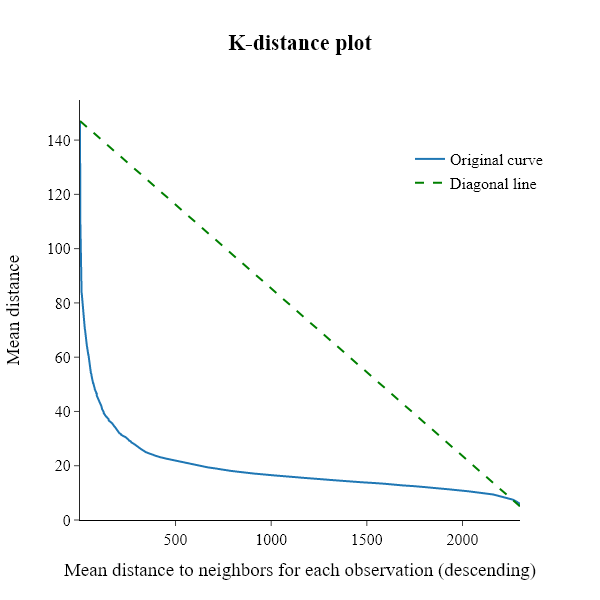

In [30]:
Other_plots.k_distance_plot(data=df, min_points=6)

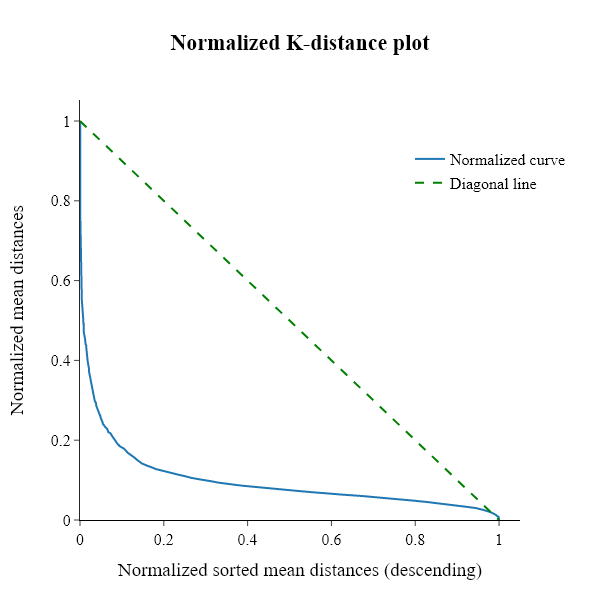

In [31]:
Other_plots.k_distance_normalized_plot(data=df, min_points=6)

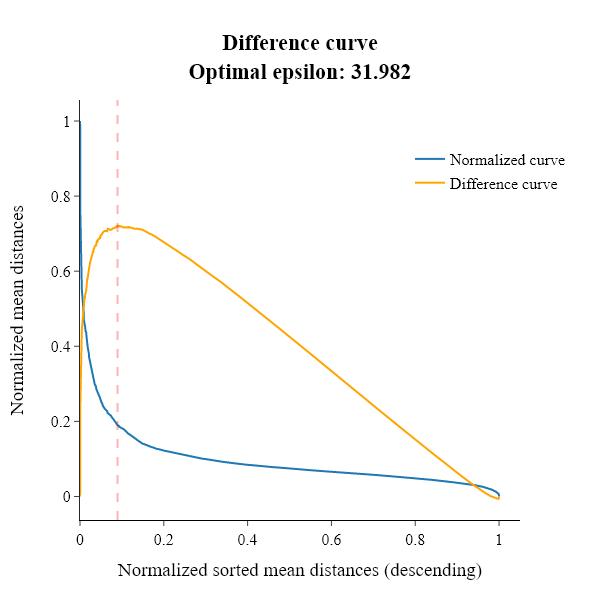

In [32]:
Other_plots.difference_curve_epsilon(data=df, min_points=6)

$\text{Optimal value: } \varepsilon=31.982$

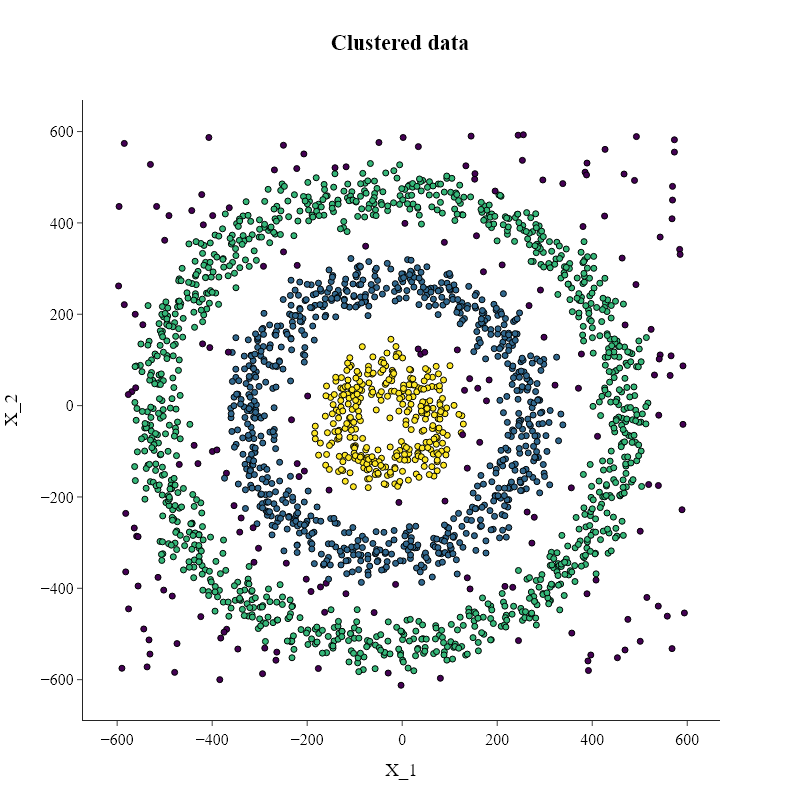

In [33]:
model = DBSCAN(epsilon=31.982, min_points=6, random_state=17)
model.fit(df)
Other_plots.plot_cluster_2d_data_without_centers(data=df, model=model)

$\text{It looks much better now!}$

<h2>Advantages and Disadvantages of DBSCAN<h2>

$\text{Advantages of DBSCAN:}$<p>
$\text{- It is more resistant to outliers than Hierarchical Clustering and KMeans,}$<p>
$\text{- Does not require a top-down determination of the number of clusters.}$<p>
$\text{Disadvantages of DBSCAN:}$<p>
$\text{- Depending on the choice of } \varepsilon \text{ and min\_points, we can get different results,}$<p>
$\text{- Standardization of the data is needed.}$